In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

In [4]:
calendar_data = pd.read_csv('calendar.csv')

listings_data = pd.read_csv('listings (2).csv.gz')

reviews_data = pd.read_csv('reviews (3).csv.gz')

In [3]:
listings_data.shape

(3249, 74)

In [4]:
listings_data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [3]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20211019170555,2021-10-19,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,...,4.95,4.86,4.90,NaN,f,1,1,0,0,0.29
1,5506,https://www.airbnb.com/rooms/5506,20211019170555,2021-10-19,** Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,...,4.89,4.53,4.78,Approved by the government,f,10,10,0,0,0.90
2,6695,https://www.airbnb.com/rooms/6695,20211019170555,2021-10-19,Home Away from Home! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,...,4.95,4.48,4.70,STR446650,f,10,10,0,0,1.33
3,8789,https://www.airbnb.com/rooms/8789,20211019170555,2021-10-19,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/32210/7fdd2fd...,26988,https://www.airbnb.com/users/show/26988,...,4.96,4.96,4.56,NaN,f,6,6,0,0,0.30
4,10730,https://www.airbnb.com/rooms/10730,20211019170555,2021-10-19,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Beacon Hill is located downtown and is conveni...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,...,4.92,4.96,4.43,NaN,f,6,6,0,0,0.40


In [6]:
reviews_data.shape

(126679, 6)

In [5]:
reviews_data.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


In [5]:
# merging listing and reviews data

dataframe= pd.merge(reviews_data, listings_data[['neighbourhood_cleansed', 'host_id', 'latitude','longitude', 'number_of_reviews', 'id', 'property_type','review_scores_communication','review_scores_location','review_scores_value','review_scores_cleanliness','review_scores_checkin','review_scores_rating','review_scores_accuracy']], 
              left_on='listing_id', right_on='id', how='left')

dataframe.rename(columns = {'id_x':'id', 'neighbourhood_cleansed':'neighbourhood_group'}, inplace=True)
dataframe.drop(['id_y'], axis=1, inplace=True)

In [6]:
dataframe.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,4.95,4.86,4.9,4.95,5.0,4.95,5.0
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,4.95,4.86,4.9,4.95,5.0,4.95,5.0
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,4.95,4.86,4.9,4.95,5.0,4.95,5.0
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,4.95,4.86,4.9,4.95,5.0,4.95,5.0
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,4.95,4.86,4.9,4.95,5.0,4.95,5.0


In [51]:
dataframe.shape

(126679, 17)

In [6]:
#count missing values
dataframe['comments'].isnull().sum()

100

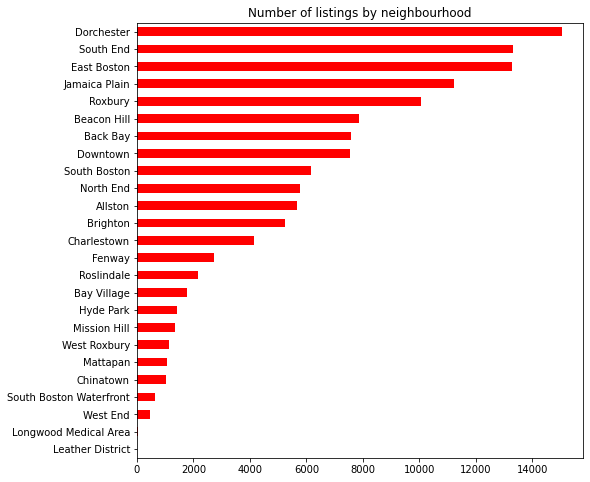

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
dataframe['neighbourhood_group'].value_counts().sort_values(ascending=True).plot.barh(x='neighbourhood_group',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Number of listings by neighbourhood")

plt.show()

In [9]:
# group by hosts and count the number of unique listings --> cast it to a dataframe
properties_per_host = pd.DataFrame(dataframe.groupby('host_id')['listing_id'].nunique())

# sort unique values descending and show the Top20
properties_per_host.sort_values(by=['listing_id'], ascending=False, inplace=True)
properties_per_host.head(20)

,listing_id
host_id,
22348222,55
21184200,39
814298,38
212359760,32
275849638,30
18517776,27
365116307,25
71783,25
16186589,23


In [16]:
top1_host = dataframe.host_id == 22348222
dataframe[top1_host].neighbourhood_group.value_counts()

pd.DataFrame(dataframe[top1_host].groupby('neighbourhood_group')['listing_id'].nunique())

,listing_id
neighbourhood_group,
Back Bay,13
Beacon Hill,14
South End,28


In [17]:
pd.DataFrame(dataframe[top1_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire rental unit,55


In [18]:
top2_host = dataframe.host_id == 21184200
dataframe[top2_host].neighbourhood_group.value_counts()

pd.DataFrame(dataframe[top2_host].groupby('neighbourhood_group')['listing_id'].nunique())

,listing_id
neighbourhood_group,
Back Bay,14
Beacon Hill,7
Downtown,3
Fenway,5
South End,10


In [19]:
pd.DataFrame(dataframe[top2_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire condominium (condo),1
Entire rental unit,38


In [20]:
top3_host = dataframe.host_id == 814298
dataframe[top3_host].neighbourhood_group.value_counts()

pd.DataFrame(dataframe[top3_host].groupby('neighbourhood_group')['listing_id'].nunique())

,listing_id
neighbourhood_group,
Back Bay,10
Beacon Hill,9
Dorchester,1
Roxbury,14
South Boston,3
South End,1


In [21]:
pd.DataFrame(dataframe[top3_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire bed and breakfast,1
Entire rental unit,23
Private room in rental unit,8
Private room in residential home,6


# Preprocessing

In [63]:
dataframe.isna().sum()

listing_id                       0
id                               0
date                             0
reviewer_id                      0
reviewer_name                    1
comments                       100
neighbourhood_group              0
host_id                          0
latitude                         0
longitude                        0
number_of_reviews                0
property_type                    0
review_scores_communication     21
review_scores_location          23
review_scores_value             23
review_scores_cleanliness       21
review_scores_checkin           23
review_scores_rating             0
review_scores_accuracy          22
dtype: int64

In [64]:
dataframe.dropna(inplace=True)
dataframe.isna().sum()

listing_id                     0
id                             0
date                           0
reviewer_id                    0
reviewer_name                  0
comments                       0
neighbourhood_group            0
host_id                        0
latitude                       0
longitude                      0
number_of_reviews              0
property_type                  0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_rating           0
review_scores_accuracy         0
dtype: int64

In [17]:
len(dataframe.comments)

126679

In [7]:
dataframe.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,4.95,4.86,4.9,4.95,5.0,4.95,5.0
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,4.95,4.86,4.9,4.95,5.0,4.95,5.0
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,4.95,4.86,4.9,4.95,5.0,4.95,5.0
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,4.95,4.86,4.9,4.95,5.0,4.95,5.0
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,4.95,4.86,4.9,4.95,5.0,4.95,5.0


In [26]:
dataframe.shape

(126578, 12)

In [10]:
dataframe.groupby('neighbourhood_group')["review_scores_rating"].describe().transpose()

neighbourhood_group,Allston,Back Bay,Bay Village,Beacon Hill,Brighton,Charlestown,Chinatown,Dorchester,Downtown,East Boston,...,Mattapan,Mission Hill,North End,Roslindale,Roxbury,South Boston,South Boston Waterfront,South End,West End,West Roxbury
count,5652.000000,7588.000000,1783.000000,7866.000000,5229.000000,4142.000000,1036.000000,15053.000000,7548.000000,13280.000000,...,1066.000000,1341.000000,5759.000000,2173.000000,10050.000000,6147.000000,631.000000,13302.000000,453.000000,1140.000000
mean,4.785633,4.670853,4.700735,4.726212,4.792113,4.848346,4.747008,4.746880,4.638408,4.781986,...,4.747486,4.749918,4.682608,4.843046,4.788002,4.814161,4.765959,4.711546,4.823709,4.841509
std,0.187637,0.212408,0.257845,0.198946,0.185566,0.124452,0.120589,0.225302,0.231195,0.165525,...,0.164309,0.152752,0.217833,0.161186,0.165533,0.199746,0.458788,0.204009,0.194932,0.137651
min,0.000000,2.000000,3.000000,0.000000,0.000000,3.860000,4.000000,1.000000,0.000000,3.000000,...,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,4.000000
25%,4.680000,4.560000,4.430000,4.640000,4.710000,4.780000,4.690000,4.610000,4.520000,4.720000,...,4.710000,4.660000,4.600000,4.820000,4.690000,4.790000,4.800000,4.560000,4.730000,4.720000
50%,4.810000,4.730000,4.820000,4.740000,4.820000,4.880000,4.760000,4.810000,4.680000,4.820000,...,4.760000,4.750000,4.670000,4.860000,4.810000,4.880000,4.800000,4.750000,4.890000,4.910000
75%,4.910000,4.820000,4.880000,4.860000,4.890000,4.920000,4.830000,4.920000,4.770000,4.890000,...,4.790000,4.850000,4.880000,4.920000,4.910000,4.930000,4.860000,4.860000,4.950000,4.920000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [20]:

df = dataframe.groupby(['neighbourhood_group']).mean()['review_scores_rating']

df.sort_values()

neighbourhood_group
Downtown                   4.638408
Back Bay                   4.670853
North End                  4.682608
Bay Village                4.700735
South End                  4.711546
Fenway                     4.714065
Beacon Hill                4.726212
Dorchester                 4.746880
Chinatown                  4.747008
Mattapan                   4.747486
Mission Hill               4.749918
South Boston Waterfront    4.765959
East Boston                4.781986
Allston                    4.785633
Roxbury                    4.788002
Brighton                   4.792113
South Boston               4.814161
Hyde Park                  4.817926
West End                   4.823709
West Roxbury               4.841509
Roslindale                 4.843046
Charlestown                4.848346
Jamaica Plain              4.856568
Leather District           4.860000
Longwood Medical Area      4.904878
Name: review_scores_rating, dtype: float64

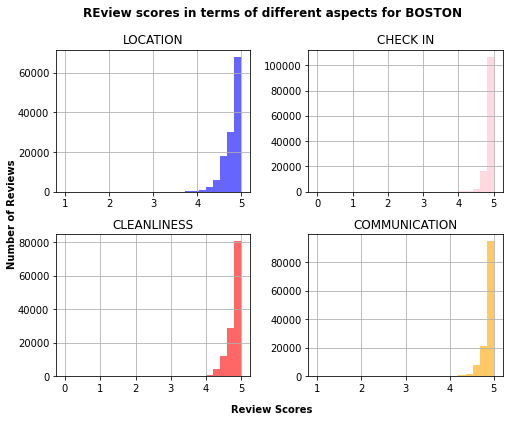

In [91]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(8,6))

# plot all 4 histograms
dataframe.hist('review_scores_location', bins=25, ax=axes[0,0], color='blue', alpha=0.6)
axes[0,0].set_title('LOCATION')

dataframe.hist('review_scores_checkin', bins=25, ax=axes[0,1], color='pink', alpha=0.6)
axes[0,1].set_title('CHECK IN')

dataframe.hist('review_scores_cleanliness', bins=25, ax=axes[1,0], color='red', alpha=0.6)
axes[1,0].set_title('CLEANLINESS')

dataframe.hist('review_scores_communication', bins=25, ax=axes[1,1], color='orange', alpha=0.6)
axes[1,1].set_title('COMMUNICATION')




# plot common x- and y-label
fig.text(0.5, 0.04, 'Review Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('REview scores in terms of different aspects for BOSTON\n\n', fontsize=12, fontweight='bold');

# word frequency

In [9]:
import itertools
import collections

def convert(lst): 
    return ([i for item in lst for i in item.lower().split()]) 

#fill missing values with NA
all_words_review = convert(dataframe['comments'].fillna(""))

In [16]:
# WORDS ARE SPLIT TO COUNT FREQUENCY

In [10]:
count_word = collections.Counter(all_words_review) #Count word frequency

clean_word_count = pd.DataFrame(count_word.most_common(5),
                             columns=['words', 'count'])

clean_word_count.head()

,words,count
0,the,265576
1,and,255064
2,to,165826
3,a,162909
4,was,133982


# REMOVING STOPWORDS OF NO VALUE

In [11]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [12]:
stop_words = set(stopwords.words(['english']))

# View a few words from the set
list(stop_words)[0:30]

['how',
 'that',
 'ma',
 'ourselves',
 'yourselves',
 'an',
 "don't",
 "hadn't",
 "mightn't",
 'wouldn',
 'him',
 'doesn',
 's',
 'your',
 'them',
 'there',
 'wasn',
 'o',
 'in',
 "couldn't",
 'been',
 'at',
 'having',
 'further',
 "you'd",
 'most',
 'we',
 'mightn',
 'do',
 'shouldn']

In [13]:
words_review_cleaned = [word for word in all_words_review if word not in stop_words]
words_review_count = collections.Counter(words_review_cleaned)

word_review_count_df = pd.DataFrame(words_review_count.most_common(15),
                             columns=['words', 'count'])

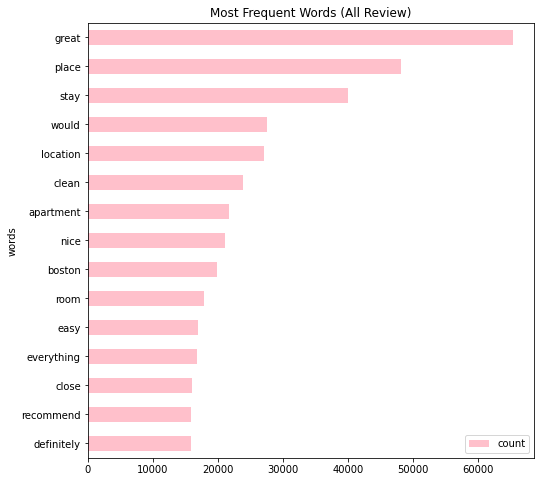

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_review_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pINK")

ax.set_title("Most Frequent Words (All Review)")

plt.show()

In [14]:
from langdetect import detect

In [15]:
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [16]:
%%time 
dataframe['language'] = dataframe['comments'].apply(language_detection)

Wall time: 10min 12s


In [22]:
dataframe.language.value_counts().head(10)

en       119573
fr         1756
es         1135
de          672
ro          532
zh-cn       527
ko          313
it          256
pt          210
so          196
Name: language, dtype: int64

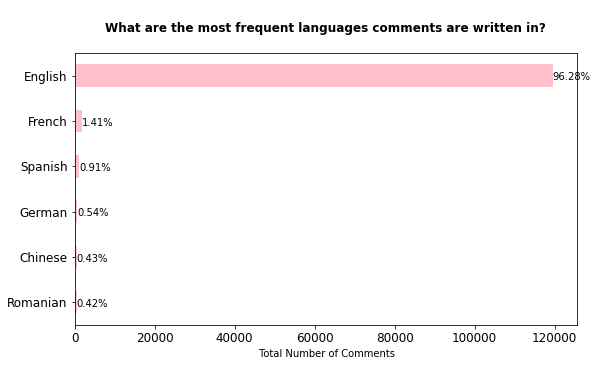

In [26]:
ax = dataframe.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="pink", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'French', 'Spanish', 'German', 'Chinese','Romanian'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
    
# invert for largest on top 
ax.invert_yaxis()

In [32]:
eng_data = dataframe[(dataframe['language']=='en')]


In [50]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [51]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [33]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

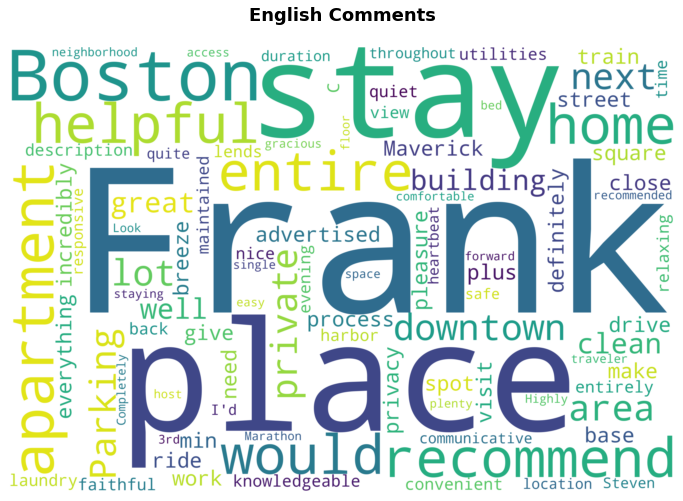

In [34]:
#WORD CLOUD FOR ENGLISH WORDS

wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="white", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(eng_data.comments.values))

plot_wordcloud(wordcloud, 'English')

# SENTIMENTAL ANALYSIS


In [10]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [38]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = SentimentIntensityAnalyzer().polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [39]:
#EXAMPLE

print_sentiment_scores("The host was very good")

The host was very good------------------ {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}


In [61]:
# Here we can see that the VADER produces four sentiment metrics from these word ratings
#The first three - positive, neutral and negative - represent the proportion of the text that falls into those categories
#The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1

In [35]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [67]:
negative_score("The host is very good but the services are bad!")

0.333

In [68]:
neutral_score("The host is very good but the services are bad!")

0.528

In [69]:
positive_score("The host is very good but the services are bad!")

0.138

In [70]:
compound_score("The host is very good but the services are bad!")

-0.6053

In [40]:
%%time

eng_data['sentiment_neg'] = eng_data['comments'].apply(negative_score)
eng_data['sentiment_neu'] = eng_data['comments'].apply(neutral_score)
eng_data['sentiment_pos'] = eng_data['comments'].apply(positive_score)
eng_data['sentiment_compound'] = eng_data['comments'].apply(compound_score)

Wall time: 9min 26s


In [41]:
eng_data.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,en,0.000,0.659,0.341,0.8070
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,en,0.000,0.952,0.048,0.5719
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,en,0.000,0.719,0.281,0.9557
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,en,0.000,0.674,0.326,0.9780
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,en,0.049,0.860,0.091,0.5379


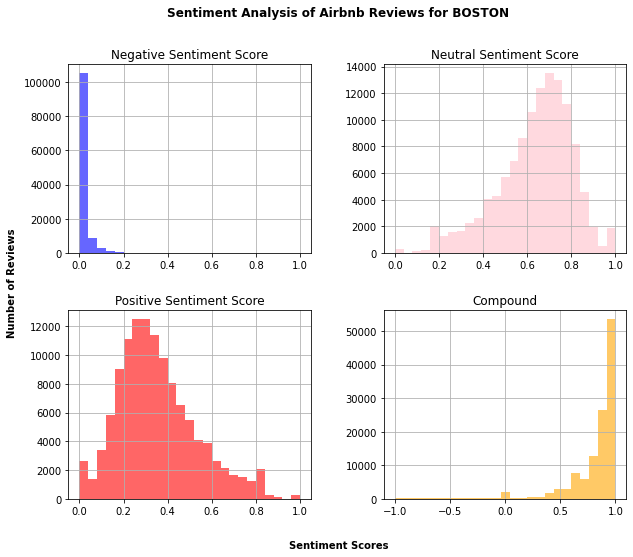

In [42]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
eng_data.hist('sentiment_neg', bins=25, ax=axes[0,0], color='blue', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
eng_data.hist('sentiment_neu', bins=25, ax=axes[0,1], color='pink', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
eng_data.hist('sentiment_pos', bins=25, ax=axes[1,0], color='red', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
eng_data.hist('sentiment_compound', bins=25, ax=axes[1,1], color='orange', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for BOSTON\n\n', fontsize=12, fontweight='bold');

In [47]:
eng_data.query('sentiment_pos> 0')

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,en,0.000,0.659,0.341,0.8070
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,en,0.000,0.952,0.048,0.5719
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,en,0.000,0.719,0.281,0.9557
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,en,0.000,0.674,0.326,0.9780
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...,East Boston,4804,42.36413,-71.02991,21,Entire rental unit,en,0.049,0.860,0.091,0.5379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126674,52615785,474617200655639495,2021-10-16,423766055,Abdulkarim,Great location <br/>Steven was a great host co...,Downtown,275849638,42.35565,-71.06128,1,Entire rental unit,en,0.000,0.523,0.477,0.8481
126675,52615817,468829552129880137,2021-10-08,5405281,Sravya,This place is very clean and comfortable. The ...,Downtown,275849638,42.35394,-71.06110,2,Entire rental unit,en,0.000,0.496,0.504,0.9354
126676,52615817,475995853922424583,2021-10-18,38715483,Christopher,Steven was very responsive and communicative. ...,Downtown,275849638,42.35394,-71.06110,2,Entire rental unit,en,0.000,0.534,0.466,0.8622
126677,52653198,471736779685385538,2021-10-12,195662357,Andy,"Had a great stay! Very clean home in a quite, ...",West Roxbury,4546050,42.27867,-71.15988,2,Private room in guest suite,en,0.000,0.599,0.401,0.9333


In [48]:
eng_data.query('sentiment_neg > sentiment_pos')

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
351,18711,319931967,2018-09-07,28095864,Eleanor,The first thing to know about this apartment i...,Dorchester,71783,42.32212,-71.06096,52,Entire rental unit,en,0.072,0.885,0.044,-0.3718
448,22354,13234228,2014-05-22,3881973,Andy,Would not recommend for several reasons: 1. It...,South End,85770,42.34487,-71.07441,315,Private room in residential home,en,0.076,0.874,0.050,0.0139
456,22354,14174744,2014-06-13,544588,Chris,Funky old home and a comfy bed. Robert was acc...,South End,85770,42.34487,-71.07441,315,Private room in residential home,en,0.140,0.860,0.000,-0.5255
457,22354,14211324,2014-06-14,289496,Raja,Had a terrible time communicating to the host....,South End,85770,42.34487,-71.07441,315,Private room in residential home,en,0.089,0.842,0.069,-0.6801
824,40601,81092635,2016-06-20,69881554,Murray,"great neighborhood, no complaints",Jamaica Plain,174986,42.31347,-71.11082,83,Private room in residential home,en,0.490,0.100,0.410,0.0516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126562,51942215,459286641617792036,2021-09-25,32363159,Xinran,The host canceled my reservation. This is a fa...,South End,420691141,42.34348,-71.06346,1,Shared room in rental unit,en,0.279,0.721,0.000,-0.4767
126574,51978517,465860697545410544,2021-10-04,401717411,Tabitha,This is a great location. The host was fabulo...,Beacon Hill,21184200,42.35996,-71.06816,1,Entire rental unit,en,0.138,0.752,0.110,-0.1531
126583,51979510,459410825250945457,2021-09-25,14857773,Gary,My stay at AirbnbQueen's basement unit apartme...,South End,21184200,42.33793,-71.07768,4,Entire rental unit,en,0.055,0.945,0.000,-0.5718
126630,52171619,458146047917847516,2021-09-23,185556715,Laura,False advertising and dishonest! The place was...,South End,85130,42.34367,-71.07919,1,Room in aparthotel,en,0.148,0.852,0.000,-0.8168


In [78]:
percentiles = eng_data.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    119578.000000
mean          0.815718
std           0.252353
min          -0.998400
5%            0.386870
10%           0.571900
20%           0.726300
30%           0.819700
40%           0.871500
50%           0.905800
60%           0.931000
70%           0.950000
80%           0.965200
90%           0.978800
max           0.999400
Name: sentiment_compound, dtype: float64

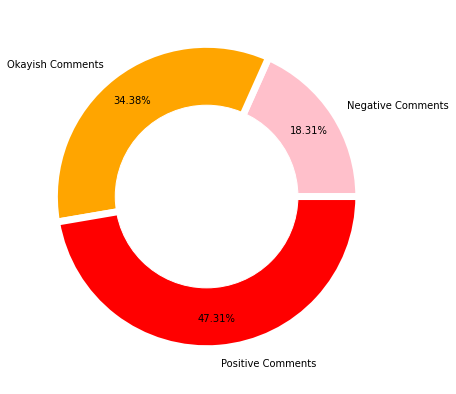

In [82]:
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['pink', 'orange', 'red'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [83]:
# full dataframe with POSITIVE comments
df_pos = eng_data.loc[eng_data.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [85]:
# full dataframe with NEGATIVE comments
df_neg = eng_data.loc[eng_data.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

# comparing positive and negative comments

In [86]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

In [87]:
pos_comments[10:15]

["My partner and I stayed for a week at Terry's during our vacation and it was a great experience.  We were happy with our decision to stay there.  The space is comfortable; we were able to relax.  The room is very close to the train, so it was easy to hop on the train and get around Boston and come back to our room whenever we wanted.  We felt welcomed, safe, and comfortable.  I would recommend it without hesitations.",
 'Terry is welcoming and helpful.  The condo was lovely - thoroughly applianced kitchen, gorgeous bathroom,  comfortable lounge and cosy bed. I felt very at home and it was easy to get in to Boston, with loads of useful information, mpas, books etc.  The only small niggle is that the staircase to the bedroom was a surprise! but otherwise thank you for a wonderful warm stay',
 "I stayed at Terry's for 3 nights. The guest room was great! Very clean, and everything as promised was there. Terry's attention to detail and small details were much appreciated. Much better valu

In [88]:
# read some negative comments
neg_comments[10:15]

['Room C is in the attic, narrow stairway without light.  Light bulb burned out. Air conditioner very noisy, hard to sleep. Mattress on floor, a bit claustrophobic.  Sketchy neighborhood.  Close to subway.',
 "Bad experience! It's just an attic and dirty. The wifi speed is very slow, do not recommend to others.",
 'Hermina is a very responsive host. She went above and beyond to help me solve since reservation issues (that were totally my fault, but hers). Cannot thank her enough.',
 'No review.',
 'Everything was just as advertised. Had no problems and Ann was very quick to answer any questions via phone. Location is unbeatable. Had a wonderful stay at the apartment. ']

# word cloud for positive comments

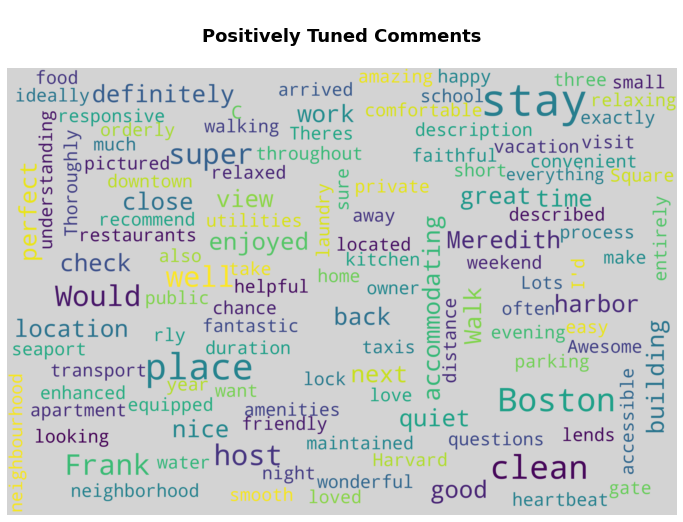

In [91]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="lightgrey",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

In [103]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

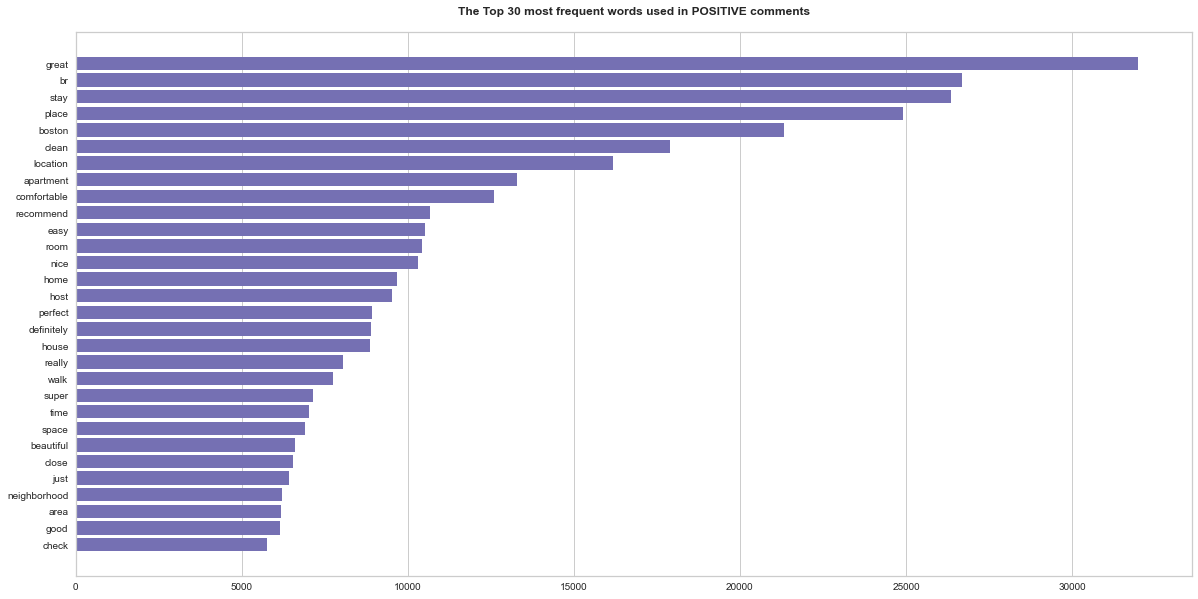

In [114]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('dark')
plt.figure(figsize=(20,10))
plt.title('The Top 30 most frequent words used in POSITIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# Word cloud for negative comments

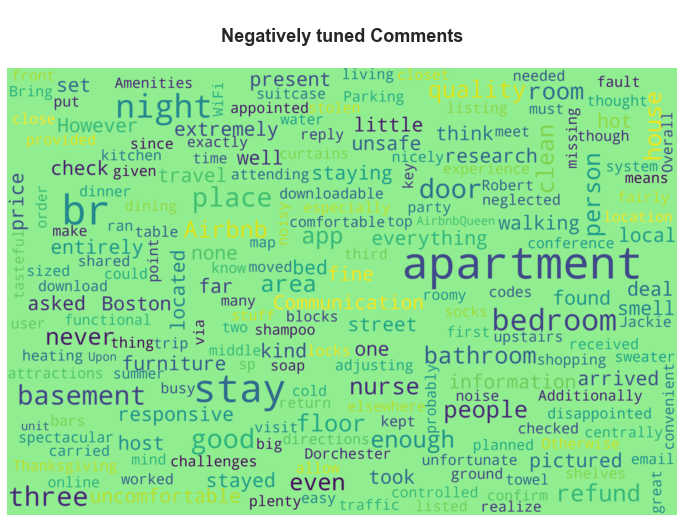

In [116]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="lightgreen",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegatively tuned')

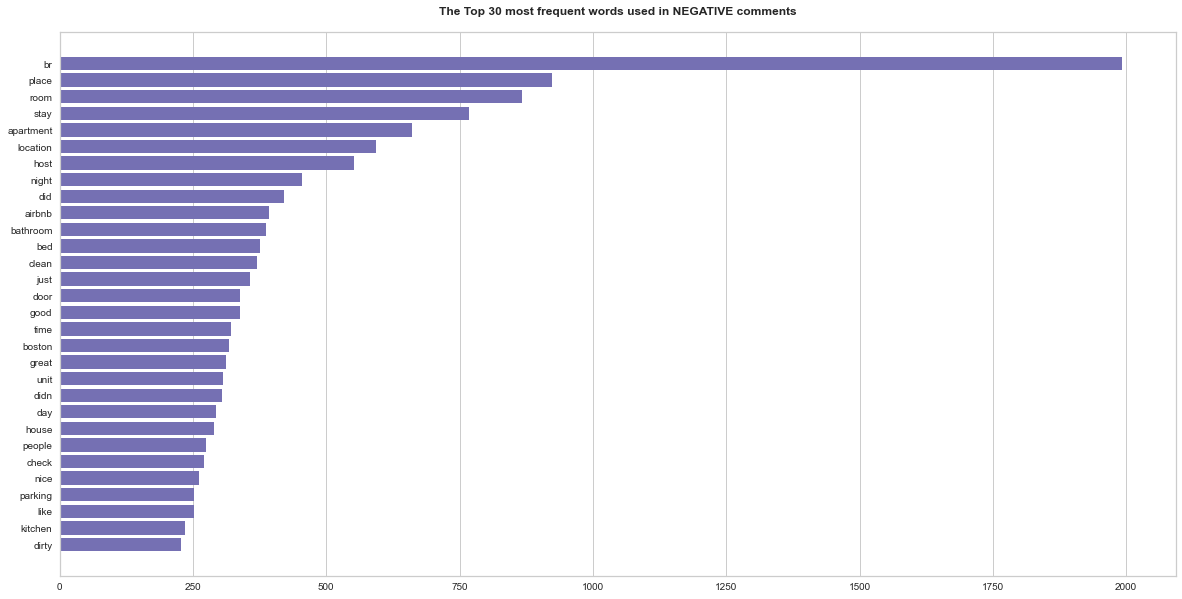

In [127]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('dark')
plt.figure(figsize=(20,10))
plt.title('The Top 30 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# To find the Top Hosts based on User Reviews and Top Hosts' neighbourhood

In [7]:
dataframe['comments'][0]

'The apartment was as advertised and Frank was incredibly helpful through the entire process. I would definitely recommend this place.'

In [8]:
# function to calculate the sentiments of the user reviews

def nltk_sentiment(input_text):
    score_dict = analyzer.polarity_scores(input_text)
    return score_dict['compound']

In [11]:
# testing the function

nltk_sentiment(dataframe['comments'][0])

0.807

In [12]:
# applying the function to the whole column

dataframe['Sentiment_NLTK'] = dataframe['comments'].apply(lambda x: nltk_sentiment(str(x)))

In [13]:
# creating a new dataframe where I'm grouping the listing_id column i.e. according to the listings
# and further calculating the average of the sentiment score

reviews_avg = dataframe .groupby(['listing_id']).mean()['Sentiment_NLTK']

reviews_avg.head

<bound method NDFrame.head of listing_id
3781        0.880005
5506        0.838939
6695        0.826416
8789        0.827700
10730       0.819113
              ...   
52613030    0.892700
52614016    0.790100
52615785    0.848100
52615817    0.898800
52653198    0.892300
Name: Sentiment_NLTK, Length: 2334, dtype: float64>

# Top 5 hosts

In [14]:
reviews_avg.nlargest()

listing_id
51347022    0.9978
39913699    0.9920
4593985     0.9908
48378476    0.9896
24356120    0.9894
Name: Sentiment_NLTK, dtype: float64

In [21]:
# listings dataset contains Detailed Listings data for Amsterdam

listings = pd.read_csv("listings (2).csv.gz")

# calendar dataset contains Detailed Calendar Data for listings in Amsterdam



# reviews dataset contains Detailed Review Data for listings in Amsterdam

reviews = pd.read_csv("reviews (3).csv.gz")

In [22]:
# creating a top_hosts dataframe

top_hosts = pd.DataFrame()
listing_ids = list(reviews_avg.nlargest().index)
for idx in listing_ids:
    top_hosts = top_hosts.append(listings[listings.id==idx])
top_hosts.reset_index(inplace=True)
del top_hosts['index']


In [23]:
top_hosts.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,51347022,https://www.airbnb.com/rooms/51347022,20211019170555,2021-10-19,"Large, Modern Studio!",Stay in the heart of Boston’s historic and pop...,South End is a modern and trendy hotspot of Bo...,https://a0.muscache.com/pictures/prohost-api/H...,409684302,https://www.airbnb.com/users/show/409684302,...,3.0,5.0,5.0,Exempt: This listing is a hotel or motel,t,16,16,0,0,0.88
1,39913699,https://www.airbnb.com/rooms/39913699,20211019170555,2021-10-19,Cozy fully renovated condo in historic Fort Hill,Our beautifully and fully renovated condo is l...,Fort Hill is the home of Highland Park and the...,https://a0.muscache.com/pictures/729cf151-7591...,64051705,https://www.airbnb.com/users/show/64051705,...,5.0,5.0,5.0,STR-414812,f,1,1,0,0,0.04
2,4593985,https://www.airbnb.com/rooms/4593985,20211019170555,2021-10-19,Parking Renovated Close to Downtown,(Please do not make a request right away. But ...,Peaceful and orderly neighborhood. Near the ho...,https://a0.muscache.com/pictures/57755927/44f6...,18517776,https://www.airbnb.com/users/show/18517776,...,5.0,4.0,4.0,NaN,f,31,0,31,0,0.01
3,48378476,https://www.airbnb.com/rooms/48378476,20211019170555,2021-10-20,views from the top of mt bowdoin,NaN,NaN,https://a0.muscache.com/pictures/bb5163bb-f1e5...,19135773,https://www.airbnb.com/users/show/19135773,...,5.0,5.0,5.0,NaN,t,1,0,1,0,0.59
4,24356120,https://www.airbnb.com/rooms/24356120,20211019170555,2021-10-19,Comfortable Place in Roslindale,Charming 3rd-floor on a leafy street atop Metr...,* 10-minute walk to Roslindale Square with its...,https://a0.muscache.com/pictures/39b032c9-020c...,183787878,https://www.airbnb.com/users/show/183787878,...,5.0,5.0,5.0,NaN,f,1,1,0,0,0.04


In [24]:
# finding the names of top hosts' property

top_hosts.host_name

0    Justin
1      Nina
2     Huggy
3      Paul
4       Leo
Name: host_name, dtype: object

In [25]:
# finding the neighbourhood of top hosts' property

top_hosts.neighbourhood_cleansed

0     South End
1       Roxbury
2       Roxbury
3    Dorchester
4    Roslindale
Name: neighbourhood_cleansed, dtype: object

In [26]:
list(top_hosts.neighbourhood_cleansed)

['South End', 'Roxbury', 'Roxbury', 'Dorchester', 'Roslindale']

In [27]:
# REVIEW/COMMENT OF TOP 1ST HOST WITH LISTING ID==51347022

list(reviews[reviews.listing_id==51347022].comments)

['Strenghts:<br/>- The room was much prettier and better equiped comparing to photos available on airbnb (was for sure refreshed, more furniture added, making this small place very practical)<br/>- On-site staff was very friendly, helpful and kept common spaces very clean <br/>- Common kitchen and loundry space is very clean and well equiped, with good quality amenities (including loundry powder, basic food supplies etc)<br/>- Location is great<br/>- Place felt very safe and well taken care of, on-site staff makes this place very "homely"<br/>- Justin answers messages very fast<br/><br/>Things to improve:<br/>- Cleaning service (or cleaning utensils so you can clean by yourself) should be available for guests in the rooms, especially as many guests rent rooms for longer periods (sometimes months!). It\'s hard to keep the room clean, without a normal vacuum cleaner and other supplies available in the room. Small hand vacuum cleaner was not enough, especially if you come with a pet and l

In [28]:
# REVIEW OF TOP 2ND HOST nina

list(reviews[reviews.listing_id==39913699].comments)

['This place is one of those “hot spots” that you want to stay in when  visiting a wonderful and dynamic city like Boston. It is situated in a quiet neighborhood close to the busiest and most beautiful parts of the city. From here you can easily reach South End - one of the most fantastic and diverse places in the capital of Massachusetts. <br/>The place itself is extraordinary cosy with a porch and a great backyard which I consider a real bonus. The apartment was very warm - this is important considering the fact that winters in Boston are harsh. Not to mention that it was very clean and met all my requirements. On top of that they have a wonderful espresso coffee machine which was really important for me as I couldn’t get used to the American coffee.<br/>But what amazes me most is that they had a brand new Play Station 4 just in case you miss your daily FIFA routine ;)<br/>So, if you plan to stay in Boston, either for a single weekend or for a whole week, this is the right place for 